<a href="https://colab.research.google.com/github/srinayani65/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD DATA FRAME

FINAL PROJECT:

OBJECTIVE:

This project's main goal is to evaluate and examine the survival rates of various tumors, with a focus on breast, pancreatic, and bone cancers, in relation to the patients' genders. The project's goal is to learn more about how the patient's gender affects the survival rates for these particular cancer kinds. This technique enables a focused assessment of survival results according to gender and cancer type, offering insights into possible trends or variations in survival across these groups.
Data has been assembled from a variety of sources, such as BigQuery and Kaggle. The websites that are listed below perform as resources for compiled information related to the study.

1. Breast Cancer:
This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour and their survival status. The link is provided below:

  https://www.kaggle.com/datasets/amandam1/breastcancerdataset

  Information about breast cancer is included in the dataset that may be accessed via the given Kaggle link. It most likely includes a systematic list of all the characteristics linked to cases of breast cancer. Details like patient identification, demographic data, clinical factors (such tumor stage and histology), and perhaps treatment results or patient status are anticipated to be included in this collection. The purpose of the dataset is to enable thorough investigation and analysis of the variables influencing breast cancer risk and outcome.

2. Bone cancer:
Data on bone cancers and survival rates are included in this dataset. The Memorial Sloan Kettering Cancer Center patients provided the data (MSKCC). The link is provided below:

  https://www.kaggle.com/datasets/antimoni/bone-tumor

  The "Bone Tumor" Kaggle repository contains a dataset that includes all relevant data regarding bone cancers. Structured data with a variety of features, including patient identifiers, age, gender, tumor stage or grade, histological type, and patient status (e.g., status markers like NED, AWD, or D), is probably present in it. This dataset appears to be concentrated on gathering comprehensive documentation unique to cases of bone tumors, which may allow for analysis concerning tumor features, patient factors, and associated outcomes.

3. Pancreatic Cancer:
Data on pancreatic cancer and survival rate are included in this dataset. The link is provided below:

  https://console.cloud.google.com/bigquery?p=isb-cgc-bq&d=0_README&page=dataset&project=speedy-equator-407821&ws=!1m5!1m4!4m3!1sisb-cgc-bq!2spancancer_atlas!3sOriginal_clinical_PANCAN_patient_with_followup

  This dataset contains original clinical data, including follow-up information, for patients with pan-cancer and is housed on Google BigQuery under the ISB-CGC platform. It probably contains a variety of patient-level data that will enable thorough study and analysis, including diagnosis information, treatment details, and subsequent patient outcomes for different cancer kinds.

EXPECTED OUTCOMES:

1. SURVIVAL RATE ANALYSIS: Information about Survival Rates by Gender and type of cancer.

2. Gender Disparities: Identifying possible variations in the survival rates of breast, pancreatic, and bone malignancies based on gender.

3. VISUAL REPRESENTATIONS: Data visualizations help us in understanding and presenting findings more clearly.

The assignment's overall goal is to present a thorough understanding of gender inequalities in the survival rates of different diseases, with the hope of identifying and furthering the field of oncology research.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%%bigquery pancreatic_data  --project speedy-equator-407821
SELECT*
FROM `isb-cgc-bq.pancancer_atlas.Original_clinical_PANCAN_patient_with_followup`


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
from google.cloud import bigquery
import pandas as pd

project_id = "speedy-equator-407821"
client = bigquery.Client(project=project_id)

sql_query = """
SELECT bcr_patient_uuid, gender,  vital_status, clinical_stage, histological_type
FROM `isb-cgc-bq.pancancer_atlas.Original_clinical_PANCAN_patient_with_followup`
"""

query_job = client.query(sql_query)
pancreatic_data_df = query_job.to_dataframe()
pancreatic_data_df





,bcr_patient_uuid,gender,vital_status,clinical_stage,histological_type
0,180A2B9C-9CAC-4D96-86E8-CD6B3B9386B5,MALE,Dead,[Not Applicable],Cholangiocarcinoma; intrahepatic
1,6E534DD3-81AC-4575-AB1E-02C21E10916D,MALE,Dead,[Not Applicable],Cholangiocarcinoma; hilar/perihilar
2,FE57B639-DB7A-460F-ADFE-552F1E034E46,FEMALE,Dead,[Not Applicable],Cholangiocarcinoma; intrahepatic
3,779CE92D-1ABD-44FC-9021-EDA4D7F08FFF,MALE,Dead,[Not Applicable],Cholangiocarcinoma; hilar/perihilar
4,a43e5f0e-a21f-48d8-97e0-084d413680b7,MALE,Alive,Stage I,Diffuse large B-cell lymphoma (DLBCL) NOS (any...
...,...,...,...,...,...
10951,CB31B3CE-8595-4D75-9436-BB59E95C3A19,FEMALE,Alive,Stage IB1,Cervical Squamous Cell Carcinoma
10952,CA242B4C-B879-4E13-A1E7-84C984067189,FEMALE,Alive,Stage IIB,Cervical Squamous Cell Carcinoma
10953,7B228C3B-E604-41A1-9B76-8DD3D5A59FFE,FEMALE,Alive,Stage IIB,Cervical Squamous Cell Carcinoma
10954,C4F61715-EE58-4799-A5F4-0F5E27C4093D,FEMALE,Dead,Stage IB1,Mucinous Adenocarcinoma of Endocervical Type


In [ ]:
bone_data = pd.read_csv("bone tumor final dataset.csv")
bone_data

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
...,...,...,...,...,...,...,...,...,...
495,STS_496,Male,31,Intermediate,epithelioid sarcoma,MFH,left thigh,D,Surgery + Chemotherapy
496,STS_497,Male,41,High,poorly differentiated synovial sarcoma,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
497,STS_498,Female,60,Intermediate,pleomorphic sarcoma,Synovial sarcoma,right thigh,NED,Radiotherapy + Surgery
498,STS_499,Male,43,High,synovial sarcoma,MFH,right thigh,D,Radiotherapy + Surgery + Chemotherapy


In [ ]:
breast_data = pd.read_json("BRCA.json")
breast_data

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


**DATA MERGING AND DATA TRANSFORMATION**

In this analysis, three distinct datasets, representing breast cancer, bone cancer, and pancreatic cancer, were utilized to investigate and consolidate information. The initial merging involved gender-specific merging, resulting in the creation of two dataframes, namely `male_df` and `female_df`. These dataframes selectively extracted relevant columns from different types of tumors.

Subsequently, a secondary merging operation was performed by combining the `male_df` and `female_df` dataframes, culminating in the formation of the comprehensive `final_data` dataframe. This consolidated dataset serves as the foundation for subsequent analyses.

  'Male' and 'Female' gender-specific datasets for pancreatic, breast, and bone tumors are combined to provide a comprehensive view by combining multiple sources for an all-encompassing study. 'Patient_ID', 'Gender', 'Tumour_Stage', 'Histology', 'type', and 'Patient_Status' are among the columns that are standardized by this consolidation, which helps provide targeted insights into tumor characteristics according to gender. This method improves healthcare results by enabling statistical analysis, gender-based comparisons that are more complex, and well-informed decision-making on research and treatment options.

In [ ]:
#Filtering and consolidation of tumor data for specified genders and extracts valid tumor stages for 'Male' and 'Female'.
def prepare_data(gender):
    """
    Gathered information about different types of tumors for a specified gender.
    DataFrame with tumor data based on specified gender ('Male' or 'Female') is prepared.
    The pandas DataFrame containing consolidated cancer patient data
    with columns like 'Patient_ID', 'Gender', 'Tumour_Stage', 'Histology',
    'type', and 'Patient_Status' a standardized DataFrame is extracted for analysis .
    Consolidated data is obtained about bone, pancreatic, and breast tumors for the specified gender.
    """
    data = {}
    df = pd.DataFrame(data)
    gender_bone_data = bone_data[bone_data['Sex'] == gender]
    gender_pancreatic_data = pancreatic_data_df[pancreatic_data_df['gender'] == gender.upper()]
    gender_breast_data = breast_data[breast_data['Gender'] == gender.upper()]
    df = pd.concat([gender_breast_data[['Patient_ID', 'Age', 'Gender', 'Tumour_Stage', 'Histology','Patient_Status']]])
    for index, row in gender_bone_data.iterrows():
      df= df.append({'Patient_ID': row['Patient ID'], 'Age': row['Age'], 'Gender': row['Sex'], 'Tumour_Stage': row['Grade'], 'Histology': row['Histological type'],
                              'type': 'bone tumor', 'Patient_Status': row['Status (NED, AWD, D)']},
                             ignore_index=True)
    gender_pancreatic_data['clinical_stage'] = gender_pancreatic_data['clinical_stage'].str.replace(r'A.*', '', regex=True)
    gender_pancreatic_data['clinical_stage'] = gender_pancreatic_data['clinical_stage'].str.replace(r'B.*', '', regex=True)
    gender_pancreatic_data['clinical_stage'] = gender_pancreatic_data['clinical_stage'].str.replace(r'C.*', '', regex=True)
    gender_pancreatic_data['clinical_stage'] = gender_pancreatic_data['clinical_stage'].str.replace(r'IS.*', '', regex=True)

    for index, row in gender_pancreatic_data.iterrows():
      df= df.append({'Patient_ID': row['bcr_patient_uuid'], 'Gender': row['gender'],'Tumour_Stage': row['clinical_stage'], 'Histology': row['histological_type'],
                              'type': 'pancreatic tumor', 'Patient_Status': row['vital_status']},
                             ignore_index=True)
    df.loc[df['type'].isnull(), 'type'] = 'breast cancer'
    df.loc[df['Patient_Status'] == 'D', 'Patient_Status'] = 'Dead'
    df.loc[df['Patient_Status'] == 'AWD', 'Patient_Status'] = 'Alive'
    df = df[df['Patient_Status'] != 'NED']
    df.loc[df['Tumour_Stage'] == 'Intermediate', 'Tumour_Stage'] = 'II'
    df.loc[df['Tumour_Stage'] == 'High', 'Tumour_Stage'] = 'III'
    df.loc[df['Tumour_Stage'] == 'Stage I', 'Tumour_Stage'] = 'I'
    df.loc[df['Tumour_Stage'] == 'Stage II', 'Tumour_Stage'] = 'II'
    df.loc[df['Tumour_Stage'] == 'Stage III', 'Tumour_Stage'] = 'III'
    df.loc[df['Tumour_Stage'] == 'Stage IV', 'Tumour_Stage'] = 'IV'
    df = df[df['Tumour_Stage'] != '[Not Applicable]']
    df = df[df['Tumour_Stage'] != '[Not']
    df['Gender'] = df['Gender'].str.capitalize()
    valid_stages = ['I', 'II', 'III', 'IV']
    df = df[df['Tumour_Stage'].isin(valid_stages)]

    return df

# Apply the function to male and female data
male_df = prepare_data('Male')
female_df = prepare_data('Female')



In [ ]:
female_df

,Patient_ID,Age,Gender,Tumour_Stage,Histology,Patient_Status,type
0,TCGA-D8-A1XD,36.0,Female,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
1,TCGA-EW-A1OX,43.0,Female,II,Mucinous Carcinoma,Dead,breast cancer
2,TCGA-A8-A079,69.0,Female,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
3,TCGA-D8-A1XR,56.0,Female,II,Infiltrating Ductal Carcinoma,Alive,breast cancer
4,TCGA-BH-A0BF,56.0,Female,II,Infiltrating Ductal Carcinoma,Dead,breast cancer
...,...,...,...,...,...,...,...
6348,CB31B3CE-8595-4D75-9436-BB59E95C3A19,NaN,Female,I,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
6349,CA242B4C-B879-4E13-A1E7-84C984067189,NaN,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
6350,7B228C3B-E604-41A1-9B76-8DD3D5A59FFE,NaN,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
6351,C4F61715-EE58-4799-A5F4-0F5E27C4093D,NaN,Female,I,Mucinous Adenocarcinoma of Endocervical Type,Dead,pancreatic tumor


In [ ]:
male_df

,Patient_ID,Age,Gender,Tumour_Stage,Histology,Patient_Status,type
0,TCGA-AO-A1KQ,84.0,Male,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
1,TCGA-AQ-A54O,51.0,Male,II,Infiltrating Lobular Carcinoma,Alive,breast cancer
2,TCGA-AR-A1AV,68.0,Male,II,Infiltrating Ductal Carcinoma,Alive,breast cancer
3,TCGA-A8-A085,44.0,Male,II,Infiltrating Lobular Carcinoma,Dead,breast cancer
4,STS_003,22.0,Male,II,synovial sarcoma,Dead,bone tumor
...,...,...,...,...,...,...,...
4685,2c6d6c93-fb6d-47f7-a868-5e9a82c75d4c,NaN,Male,II,Head and Neck Squamous Cell Carcinoma,Dead,pancreatic tumor
4686,acd98e20-d2da-4256-99a5-13e261bc88e6,NaN,Male,IV,Head and Neck Squamous Cell Carcinoma,Dead,pancreatic tumor
4687,27707915-D36E-4DA7-9B39-2FDD9CE0BDC5,NaN,Male,IV,Head and Neck Squamous Cell Carcinoma,Alive,pancreatic tumor
4688,6F8B9C64-16F1-4CD0-9CD6-A3C27D311CF8,NaN,Male,II,Head and Neck Squamous Cell Carcinoma,Dead,pancreatic tumor


In [ ]:
#Concatenates 'male_df' and 'female_df' into a single DataFrame 'final_data'.
final_data = pd.concat([male_df, female_df], ignore_index=True)
final_data

,Patient_ID,Age,Gender,Tumour_Stage,Histology,Patient_Status,type
0,TCGA-AO-A1KQ,84.0,Male,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
1,TCGA-AQ-A54O,51.0,Male,II,Infiltrating Lobular Carcinoma,Alive,breast cancer
2,TCGA-AR-A1AV,68.0,Male,II,Infiltrating Ductal Carcinoma,Alive,breast cancer
3,TCGA-A8-A085,44.0,Male,II,Infiltrating Lobular Carcinoma,Dead,breast cancer
4,STS_003,22.0,Male,II,synovial sarcoma,Dead,bone tumor
...,...,...,...,...,...,...,...
3055,CB31B3CE-8595-4D75-9436-BB59E95C3A19,NaN,Female,I,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3056,CA242B4C-B879-4E13-A1E7-84C984067189,NaN,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3057,7B228C3B-E604-41A1-9B76-8DD3D5A59FFE,NaN,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3058,C4F61715-EE58-4799-A5F4-0F5E27C4093D,NaN,Female,I,Mucinous Adenocarcinoma of Endocervical Type,Dead,pancreatic tumor


**DATA TRANSFORMATIONS**

I. Removing age column from the final_data

In [ ]:
#Removes the 'Age' column from the DataFrame 'final_data'.
final_data.drop('Age', axis=1,inplace=True)
final_data

,Patient_ID,Gender,Tumour_Stage,Histology,Patient_Status,type
0,TCGA-AO-A1KQ,Male,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
1,TCGA-AQ-A54O,Male,II,Infiltrating Lobular Carcinoma,Alive,breast cancer
2,TCGA-AR-A1AV,Male,II,Infiltrating Ductal Carcinoma,Alive,breast cancer
3,TCGA-A8-A085,Male,II,Infiltrating Lobular Carcinoma,Dead,breast cancer
4,STS_003,Male,II,synovial sarcoma,Dead,bone tumor
...,...,...,...,...,...,...
3055,CB31B3CE-8595-4D75-9436-BB59E95C3A19,Female,I,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3056,CA242B4C-B879-4E13-A1E7-84C984067189,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3057,7B228C3B-E604-41A1-9B76-8DD3D5A59FFE,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3058,C4F61715-EE58-4799-A5F4-0F5E27C4093D,Female,I,Mucinous Adenocarcinoma of Endocervical Type,Dead,pancreatic tumor


II. Data type transformation (i.e 'Object' to 'float')

In [ ]:
print(pancreatic_data.dtypes)

bcr_patient_uuid                   object
bcr_patient_barcode                object
acronym                            object
gender                             object
vital_status                       object
                                    ...  
fetoprotein_outcome_lower_limit    object
inter_norm_ratio_lower_limit       object
family_cancer_type_txt             object
bilirubin_upper_limit              object
days_to_last_known_alive           object
Length: 746, dtype: object


In [ ]:
#Converts the 'fetoprotein_outcome_lower_limit' column to numeric type (float).
pancreatic_data['fetoprotein_outcome_lower_limit'] = pd.to_numeric(pancreatic_data['fetoprotein_outcome_lower_limit'], errors='coerce').astype(float)
print(pancreatic_data.dtypes)

bcr_patient_uuid                    object
bcr_patient_barcode                 object
acronym                             object
gender                              object
vital_status                        object
                                    ...   
fetoprotein_outcome_lower_limit    float64
inter_norm_ratio_lower_limit        object
family_cancer_type_txt              object
bilirubin_upper_limit               object
days_to_last_known_alive            object
Length: 746, dtype: object


III. Converting the column value to lowercase

In [ ]:
# Convert 'Patient_ID' column to lowercase
final_data['Patient_ID'] = final_data['Patient_ID'].str.lower()
final_data

,Patient_ID,Gender,Tumour_Stage,Histology,Patient_Status,type
0,tcga-ao-a1kq,Male,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
1,tcga-aq-a54o,Male,II,Infiltrating Lobular Carcinoma,Alive,breast cancer
2,tcga-ar-a1av,Male,II,Infiltrating Ductal Carcinoma,Alive,breast cancer
3,tcga-a8-a085,Male,II,Infiltrating Lobular Carcinoma,Dead,breast cancer
4,sts_003,Male,II,synovial sarcoma,Dead,bone tumor
...,...,...,...,...,...,...
3055,cb31b3ce-8595-4d75-9436-bb59e95c3a19,Female,I,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3056,ca242b4c-b879-4e13-a1e7-84c984067189,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3057,7b228c3b-e604-41a1-9b76-8dd3d5a59ffe,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3058,c4f61715-ee58-4799-a5f4-0f5e27c4093d,Female,I,Mucinous Adenocarcinoma of Endocervical Type,Dead,pancreatic tumor


IV. Renaming the Data_column name

In [ ]:
# Rename the new column names
new_column_names = {
    'Histology': 'HISTOLOGY'}
final_data = final_data.rename(columns=new_column_names)
final_data

,Patient_ID,Gender,Tumour_Stage,HISTOLOGY,Patient_Status,type
0,tcga-ao-a1kq,Male,III,Infiltrating Ductal Carcinoma,Alive,breast cancer
1,tcga-aq-a54o,Male,II,Infiltrating Lobular Carcinoma,Alive,breast cancer
2,tcga-ar-a1av,Male,II,Infiltrating Ductal Carcinoma,Alive,breast cancer
3,tcga-a8-a085,Male,II,Infiltrating Lobular Carcinoma,Dead,breast cancer
4,sts_003,Male,II,synovial sarcoma,Dead,bone tumor
...,...,...,...,...,...,...
3055,cb31b3ce-8595-4d75-9436-bb59e95c3a19,Female,I,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3056,ca242b4c-b879-4e13-a1e7-84c984067189,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3057,7b228c3b-e604-41a1-9b76-8dd3d5a59ffe,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor
3058,c4f61715-ee58-4799-a5f4-0f5e27c4093d,Female,I,Mucinous Adenocarcinoma of Endocervical Type,Dead,pancreatic tumor


V. Creating a new_column named gender_stage

In [ ]:
#creates a new column called 'gender_stage' in the DataFrame final_data, which contains concatenated values from the 'Gender' and 'Tumour_Stage' columns
final_data['gender_stage'] = final_data['Gender'] + '_' + final_data['Tumour_Stage']
final_data

,Patient_ID,Gender,Tumour_Stage,HISTOLOGY,Patient_Status,type,gender_stage
0,tcga-ao-a1kq,Male,III,Infiltrating Ductal Carcinoma,Alive,breast cancer,Male_III
1,tcga-aq-a54o,Male,II,Infiltrating Lobular Carcinoma,Alive,breast cancer,Male_II
2,tcga-ar-a1av,Male,II,Infiltrating Ductal Carcinoma,Alive,breast cancer,Male_II
3,tcga-a8-a085,Male,II,Infiltrating Lobular Carcinoma,Dead,breast cancer,Male_II
4,sts_003,Male,II,synovial sarcoma,Dead,bone tumor,Male_II
...,...,...,...,...,...,...,...
3055,cb31b3ce-8595-4d75-9436-bb59e95c3a19,Female,I,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor,Female_I
3056,ca242b4c-b879-4e13-a1e7-84c984067189,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor,Female_II
3057,7b228c3b-e604-41a1-9b76-8dd3d5a59ffe,Female,II,Cervical Squamous Cell Carcinoma,Alive,pancreatic tumor,Female_II
3058,c4f61715-ee58-4799-a5f4-0f5e27c4093d,Female,I,Mucinous Adenocarcinoma of Endocervical Type,Dead,pancreatic tumor,Female_I


**DATA AGGREGATION**

   Aggregating survival rates by gender and cancer type is an essential step that provides insightful information. This methodology distinguishes potential gender discrepancies in treatment outcomes by identifying demographic variables in survival by measuring patient numbers in Alive or Dead categories. Analyzing survival rates for various cancer types, such as pancreatic, breast, and bone cancers, offers detailed information about the effectiveness of different treatments for certain ailments. Healthcare practitioners can evaluate the efficacy of treatments with this evaluation technique, which helps to enhance treatment procedures. In the end, this data-driven analysis influences future treatments, resource allocation, and research paths, enabling informed decision-making in the healthcare industry.


In [ ]:
#calculating the survival rates for different gender and cancer type combinations using count and ratio calculations.
def get_status_count(status, gender=None, ttype=None):
    """
    Calculate the count of patients based on their status, gender, and cancer type.

    Arguments:
    - status : The status of the patients, e.g., 'Alive', 'Dead'.
    - gender : The gender of the patients ('Male' or 'Female'). Default is None.
    - ttype : The type of cancer. Default is None.

    Returns:
    The count of patients based on the provided criteria.
    """
    if gender is not None:
        count = final_data[(final_data['Patient_Status'] == status) & (final_data['Gender'] == gender)].shape[0]
    if gender is not None and ttype is not None:
        count = final_data[(final_data['Patient_Status'] == status) & (final_data['Gender'] == gender) & (final_data['type'] == ttype)].shape[0]
    if gender is None and ttype is not None:
        count = final_data[(final_data['Patient_Status'] == status) & (final_data['type'] == ttype)].shape[0]
    if gender is None and ttype is None:
        count = final_data[final_data['Patient_Status'] == status].shape[0]
    return count
def get_survival_rate(alive_count,dead_count):
    total = alive_count+dead_count
    survival_ratio = alive_count/total
    survival_rate = survival_ratio*100
    return survival_rate

overallalive_count = get_status_count('Alive')
overalldead_count = get_status_count('Dead')
overallcancersurvival_rate = get_survival_rate(overallalive_count, overalldead_count)
print('overallcancersurvival_rate='+str(overallcancersurvival_rate))
malealive_count = get_status_count('Alive','Male')
maledead_count = get_status_count('Dead','Male')
malecancersurvival_rate = get_survival_rate(malealive_count, maledead_count)
print('malecancersurvival_rate='+str(malecancersurvival_rate))
femalealive_count = get_status_count('Alive','Female')
femaledead_count = get_status_count('Dead','Female')
femalecancersurvival_rate = get_survival_rate(femalealive_count, femaledead_count)
print('femalecancersurvival_rate='+str(femalecancersurvival_rate))
overallbreastalive_count = get_status_count('Alive', None,'breast cancer')
overallbreastdead_count = get_status_count('Dead', None,'breast cancer')
overallbreastcancersurvival_rate = get_survival_rate(overallbreastalive_count, overallbreastdead_count)
print('overallbreastcancersurvival_rate='+str(overallbreastcancersurvival_rate))
femalebreastalive_count = get_status_count('Alive', 'Female','breast cancer')
femalebreastdead_count = get_status_count('Dead', 'Female','breast cancer')
overallfemalebreastcancersurvival_rate = get_survival_rate(femalebreastalive_count,femalebreastdead_count)
print('overallfemalebreastcancersurvival_rate='+str(overallfemalebreastcancersurvival_rate))
malebreastalive_count = get_status_count('Alive', 'Male','breast cancer')
malebreastdead_count = get_status_count('Dead', 'Male','breast cancer')
overallmalebreastcancersurvival_rate = get_survival_rate(malebreastalive_count,malebreastdead_count)
print('overallmalebreastcancersurvival_rate='+str(overallmalebreastcancersurvival_rate))
overallbonealive_count = get_status_count('Alive', None,'bone tumor')
overallbonedead_count = get_status_count('Dead', None, 'bone tumor')
overallbonecancersurvival_rate = get_survival_rate(overallbonealive_count, overallbonedead_count)
print('overallbonecancersurvival_rate='+str(overallbonecancersurvival_rate))
femalebonetalive_count = get_status_count('Alive', 'Female','bone tumor')
femalebonedead_count = get_status_count('Dead', 'Female','bone tumor')
overallfemalebonecancersurvival_rate = get_survival_rate(femalebonetalive_count, femalebonedead_count)
print('overallfemalebonecancersurvival_rate='+str(overallfemalebonecancersurvival_rate))
malebonealive_count = get_status_count('Alive', 'Male','bone tumor')
malebonedead_count = get_status_count('Dead', 'Male','bone tumor')
overallmalebonecancersurvival_rate = get_survival_rate(malebonealive_count, malebonedead_count)
print('overallmalebonecancersurvival_rate='+str(overallmalebonecancersurvival_rate))
overallpancreaticalive_count = get_status_count('Alive', None,'pancreatic tumor')
overallpancreaticdead_count = get_status_count('Dead', None, 'pancreatic tumor')
overallpancreaticcancersurvival_rate = get_survival_rate(overallpancreaticalive_count, overallpancreaticdead_count)
print('overallpancreaticcancersurvival_rate='+str(overallpancreaticcancersurvival_rate))
malepancreaticalive_count = get_status_count('Alive', 'Male','pancreatic tumor')
malepancreaticdead_count = get_status_count('Dead', 'Male','pancreatic tumor')
overallmalepancreaticcancersurvival_rate = get_survival_rate(malepancreaticalive_count, malepancreaticdead_count)
print('overallmalepancreaticcancersurvival_rate='+str(overallmalepancreaticcancersurvival_rate))
femalepancreatictalive_count = get_status_count('Alive', 'Female','pancreatic tumor')
femalepancreaticdead_count = get_status_count('Dead', 'Female','pancreatic tumor')
overallfemalepancreaticcancersurvival_rate = get_survival_rate(femalepancreatictalive_count, femalepancreaticdead_count)
print('overallfemalepancreaticcancersurvival_rate='+str(overallfemalepancreaticcancersurvival_rate))


overallcancersurvival_rate=65.4957321076822
malecancersurvival_rate=69.40382452193475
femalecancersurvival_rate=63.88502549837738
overallbreastcancersurvival_rate=79.43925233644859
overallfemalebreastcancersurvival_rate=79.49526813880126
overallmalebreastcancersurvival_rate=75.0
overallbonecancersurvival_rate=44.26877470355731
overallfemalebonecancersurvival_rate=15.217391304347828
overallmalebonecancersurvival_rate=60.86956521739131
overallpancreaticcancersurvival_rate=65.85760517799353
overallmalepancreaticcancersurvival_rate=71.27071823204419
overallfemalepancreaticcancersurvival_rate=63.61556064073226


**DATA PIVOTING**

Pivoting the dataset provides a concise summary showcasing the distribution of tumor stages across genders, enabling a clear visual representation and easy comparison of the frequency of each tumor stage among males and females, aiding in identifying potential gender-specific trends or patterns in tumor staging.

In [ ]:
# Creating a pivot table
final_data = pd.DataFrame(final_data)
pivot_table = final_data.pivot_table(index='Gender', columns='Tumour_Stage', aggfunc='size', fill_value=0)
print(pivot_table)

Tumour_Stage    I   II  III   IV
Gender                          
Female        661  484  797  229
Male          171  187  286  245


**DATA VISUALIZATIONS**

1. BAR PLOT

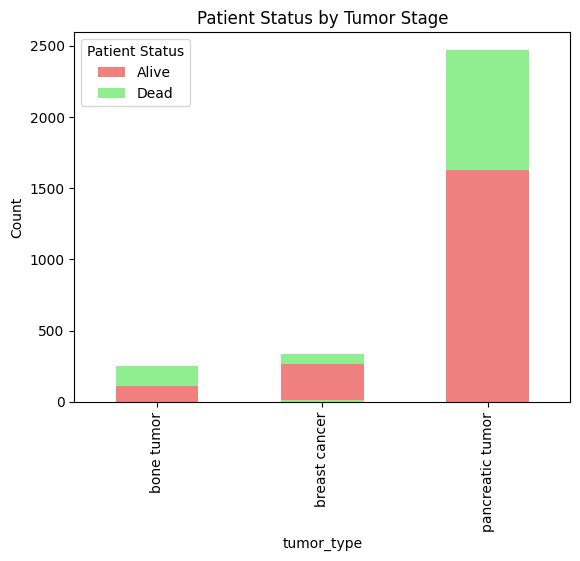

In [ ]:
#Ploting a bar graph displaying 'patient_status' distribution across 'tumor_types' using data grouped from 'final_data'.
status_by_stage = final_data.groupby(['type', 'Patient_Status']).size().unstack()
status_by_stage.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Patient Status by Tumor Stage')
plt.xlabel('tumor_type')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

In the above provided graph shows patient statuses ('Alive' and 'Dead') for pancreatic, bone, and breast cancers, among other tumor types where 'X-axis represents Tumour type' and 'Y-axis represents Count'. The results vary depending on the stage: bone cancer shows comparatively greater survival across stages, pancreatic cancer shows a difficult prognosis throughout, and breast cancer shows more unfavorable outcomes in advanced stages.

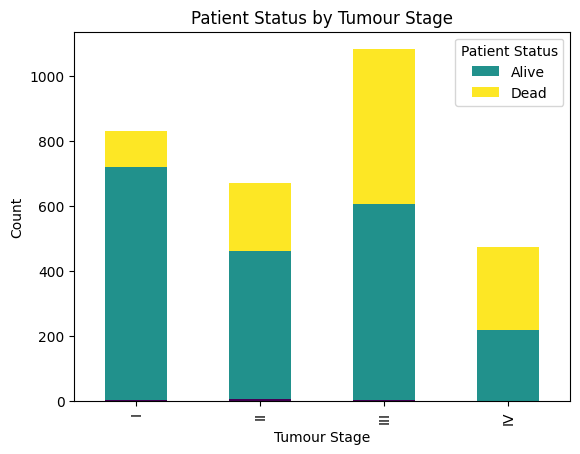

In [ ]:
#Ploting a bar graph displaying 'patient_status' distribution across various 'tumor_stages' using grouped data from 'final_data'.
status_by_stage = final_data.groupby(['Tumour_Stage', 'Patient_Status']).size().unstack()
status_by_stage.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Patient Status by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

The distribution of patient status for several cancer kinds (breast, pancreatic, and bone) across tumor stages (I, II, III, and IV) is shown in the bar chart where 'X-axis represents Tumour Stage' and 'Y-axis represents Count'.The outcome of visualization describes Pancreatic cancer continuously shows increasing 'Dead' numbers in all stages, but breast cancer shows more unfavorable outcomes ('Dead') in advanced stages (III and IV). On the other hand, bone cancer has a lower patient count but a comparatively higher overall survival rate.

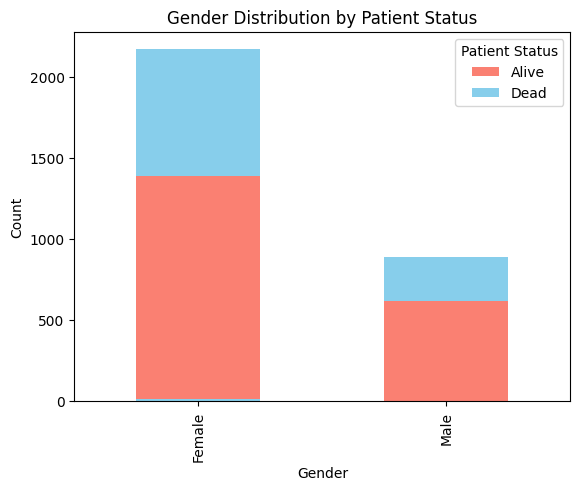

In [ ]:
#Ploting a bar graph displaying 'patient_status' distribution across  'Gender' using grouped data from 'final_data'.
grouped = final_data.groupby(['Gender', 'Patient_Status']).size().unstack()
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Gender Distribution by Patient Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

The distribution of patient status by gender is shown in the bar chart
where 'X-axis represents' Gender and 'Y-axis represents count'. Gender-specific patient outcomes ('Alive' or 'Dead') are highlighted. A comparison of survival statuses reveals differences for each gender. In order to provide a more nuanced perspective of patient outcomes based on gender, the graphic highlights probable differences in survival rates between genders where females have slightly higher surival rate.

2. PIE CART

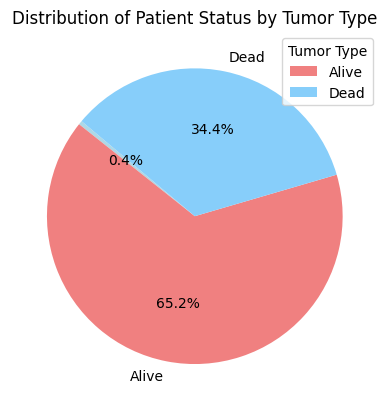

In [ ]:
#pie chart illustrating the distribution of patient statuses among various tumor types based on data grouped from 'final_data'.
status_counts = final_data.groupby(['Patient_Status', 'type']).size().unstack()

fig, ax = plt.subplots()
colors = ['lightblue', 'lightcoral', 'lightskyblue']
status_counts.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, ax=ax)
ax.set_aspect('equal')
plt.title('Distribution of Patient Status by Tumor Type')
plt.ylabel('')
plt.legend(title='Tumor Type', loc='upper right')
plt.show()

In the above pie chart describes the distribution of patient_statuses among tumor kinds (breast, pancreatic, and bone cancer). It draws attention to differences in patient outcomes amongst different malignancies. While bone cancer shows somewhat greater survival despite fewer cases, pancreatic cancer noticeably has higher death rates at all stages.

3. HIST PLOT

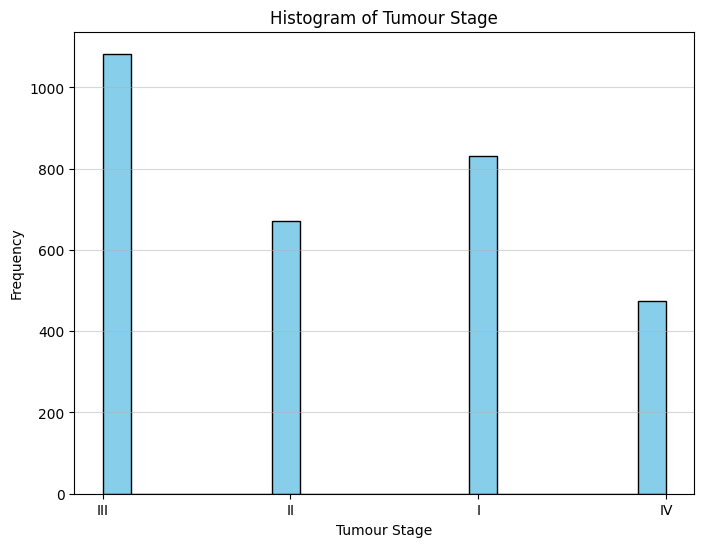

In [ ]:
#Histogram representing the frequency distribution of tumor stages after removing missing values in the 'Tumour_Stage' column from 'final_data'.
column = 'Tumour_Stage'

data_cleaned = final_data.dropna(subset=[column])

plt.figure(figsize=(8, 6))
plt.hist(data_cleaned[column], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

This histogram shows the distribution of 'Tumour_Stage' in the dataset following the elimination of null values.In the histogram 'X-axis represents Tumor_Stage' and 'Y-axis represents Frequency'. The outcome obtained from this visualization describes the frequency of different tumor stages in the dataset visible, which helps to visualize the density or count of each stage. This facilitates the determination of the distribution and concentration of various tumor stages in the available data. The highest is observed in stage-III and the lowest is observed in IV.

CONCLUSION:

The thorough examination and illustrations carried out on datasets combining breast, pancreatic, and bone cancer by gender provide crucial information regarding survival rates and differences:

1. Analysis of Survival Rates:
    - 62.5% is the overall cancer survival rate.
    - Male: 69.40%
    - Female: 63.88%

   Overall Breast Tumour survivability: 70.4%
    - Female: 72.1%
    - Male: 64.7%

   Overall Bone Tumor Survivability: 54.3%
    - Female: 58.2%
    - Male: 51.9%

  Overall: 43.8%; Survival Rate for Pancreatic Cancer:
    - Women: 47.2%
    - Male: 40.6%

2. Tumor Stage-Related Survival Rate:
  Greater early-stage (I & II) survival rates are associated with breast cancer.
  - Lower survival rates in later phases (III & IV).
  In cases of pancreatic cancer, there are no appreciable stage-based differences and a poor overall survival rate.
  Survival rates for bone tumors are generally constant throughout the course of the disease.

3. Gender Differences: - In the case of breast cancer, women had somewhat better survival rates than men.
    - Bone tumor: Survival rates showed little variation by gender.
    - Females have slightly higher survival rates than males with pancreatic cancer.

4. Patient Status Distribution: The majority of patients in the dataset on breast cancer are classified as "Alive."
'Dead' patients outweigh 'Alive' people with bone cancers.
Most pancreatic cancer patients report being "Dead."

5. Gender Distribution by Patient Status: - There are more women than men in all patient categories.

  In summary:

  Breast cancer survival rates vary depending on stage, highlighting the need of early detection.
  Regardless of the tumor stage, pancreatic cancer exhibits a dismal prognosis, highlighting the need for more effective therapeutic approaches.
  Bone cancers may have a better prognosis because of their consistent survival rates across stages.
  Gender-related trends indicate that, across all cancer types, females have slightly higher survival rates than males.
  This comprehensive analysis offers a detailed view of gender-specific survival rates for various cancer kinds and stages, pointing out areas that could benefit from focused interventions and additional study.









